In [2]:
from sklearn import datasets
import pandas as pd
import numpy as np

In [3]:
# 这里用了鸢尾花的数据集
iris = datasets.load_iris()

In [4]:
df = pd.DataFrame(data = np.c_[iris['data'],iris['target']],columns= iris['feature_names']+['target'])

In [5]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [6]:
X = df.drop(columns=['target'])
y = df['target']

In [7]:
# 五种分类器我选了：决策树，随机森林，SVM，KNN，Logistic Regression.
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

classifiers = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression()
}

In [31]:
# 对不同Classifier做k折
# 一个小点，这里其实没有必须要用分层交叉验证，因为鸢尾花这个数据集分布相当平衡，每个target都刚好50个
# 所以做普通的k折
from sklearn.model_selection import cross_val_score

iter = 20
result = {}
for name,clf in classifiers.items():
    result[name] = {}

    for k in range(2,6):
        acc = []
        for i in range(iter):
            scores = cross_val_score(clf,X,y,cv = k)
            acc.append(scores.mean())
        result[name][k] = {
            'mean_acc':np.mean(acc),
            '方差':np.var(acc),
            'max_acc':np.max(acc),
            'min_acc':np.min(acc)
        }

KeyboardInterrupt: 

In [10]:
print(result)

{'Decision Tree': {2: {'mean_acc': np.float64(0.9556666666666667), '方差': np.float64(1.0111111111110906e-05), 'max_acc': np.float64(0.96), 'min_acc': np.float64(0.9533333333333334)}, 3: {'mean_acc': np.float64(0.9659999999999996), '方差': np.float64(3.9555555555555576e-05), 'max_acc': np.float64(0.9733333333333333), 'min_acc': np.float64(0.9533333333333333)}, 4: {'mean_acc': np.float64(0.9630334281650071), '方差': np.float64(1.129930606281972e-05), 'max_acc': np.float64(0.9667496443812233), 'min_acc': np.float64(0.9599928876244666)}, 5: {'mean_acc': np.float64(0.9610000000000001), '方差': np.float64(2.3444444444444648e-05), 'max_acc': np.float64(0.9666666666666668), 'min_acc': np.float64(0.9533333333333334)}}, 'Random Forest': {2: {'mean_acc': np.float64(0.9566666666666668), '方差': np.float64(1.9999999999999815e-05), 'max_acc': np.float64(0.9666666666666667), 'min_acc': np.float64(0.9466666666666667)}, 3: {'mean_acc': np.float64(0.9600000000000002), '方差': np.float64(1.7777777777777858e-05), 'm

In [12]:
for name,k_stats in result.items():
    for k, stats in k_stats.items():
        print('{name},k={k},mean_acc={mean},var={var},max_acc={max},min_acc={min}'.format(name = name,k = k,mean = stats['mean_acc'],var = stats['方差'],max = stats['max_acc'],min = stats['min_acc']))

Decision Tree,k=2,mean_acc=0.9556666666666667,var=1.0111111111110906e-05,max_acc=0.96,min_acc=0.9533333333333334
Decision Tree,k=3,mean_acc=0.9659999999999996,var=3.9555555555555576e-05,max_acc=0.9733333333333333,min_acc=0.9533333333333333
Decision Tree,k=4,mean_acc=0.9630334281650071,var=1.129930606281972e-05,max_acc=0.9667496443812233,min_acc=0.9599928876244666
Decision Tree,k=5,mean_acc=0.9610000000000001,var=2.3444444444444648e-05,max_acc=0.9666666666666668,min_acc=0.9533333333333334
Random Forest,k=2,mean_acc=0.9566666666666668,var=1.9999999999999815e-05,max_acc=0.9666666666666667,min_acc=0.9466666666666667
Random Forest,k=3,mean_acc=0.9600000000000002,var=1.7777777777777858e-05,max_acc=0.9666666666666667,min_acc=0.9466666666666667
Random Forest,k=4,mean_acc=0.9626955903271692,var=1.5522279035792747e-05,max_acc=0.9667496443812233,min_acc=0.9532361308677098
Random Forest,k=5,mean_acc=0.9613333333333334,var=2.9333333333333814e-05,max_acc=0.9666666666666668,min_acc=0.9466666666666667

In [23]:
comparison_df = pd.DataFrame(columns=['Classifier', 'k', 'Mean Accuracy', 'Variance', 'Max Accuracy', 'Min Accuracy'])
results_list = []
# 将结果添加到列表
for name, k_stats in result.items():
    for k, stats in k_stats.items():
        results_list.append({
            'Classifier': name,
            'k': k,
            'Mean Accuracy': stats['mean_acc'],
            'Variance': stats['方差'],
            'Max Accuracy': stats['max_acc'],
            'Min Accuracy': stats['min_acc']
        })

# 结果列表转换为DataFrame
comparison_df = pd.concat([comparison_df, pd.DataFrame(results_list)], ignore_index=True)


C:\Users\18798\AppData\Local\Temp\ipykernel_26344\1422237279.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  comparison_df = pd.concat([comparison_df, pd.DataFrame(results_list)], ignore_index=True)


In [25]:
comparison_df

,Classifier,k,Mean Accuracy,Variance,Max Accuracy,Min Accuracy
0,Decision Tree,2,0.955667,1.011111e-05,0.960000,0.953333
1,Decision Tree,3,0.966000,3.955556e-05,0.973333,0.953333
2,Decision Tree,4,0.963033,1.129931e-05,0.966750,0.959993
3,Decision Tree,5,0.961000,2.344444e-05,0.966667,0.953333
4,Random Forest,2,0.956667,2.000000e-05,0.966667,0.946667
5,Random Forest,3,0.960000,1.777778e-05,0.966667,0.946667
6,Random Forest,4,0.962696,1.552228e-05,0.966750,0.953236
7,Random Forest,5,0.961333,2.933333e-05,0.966667,0.946667
8,SVM,2,0.940000,1.232595e-32,0.940000,0.940000
9,SVM,3,0.960000,4.930381e-32,0.960000,0.960000


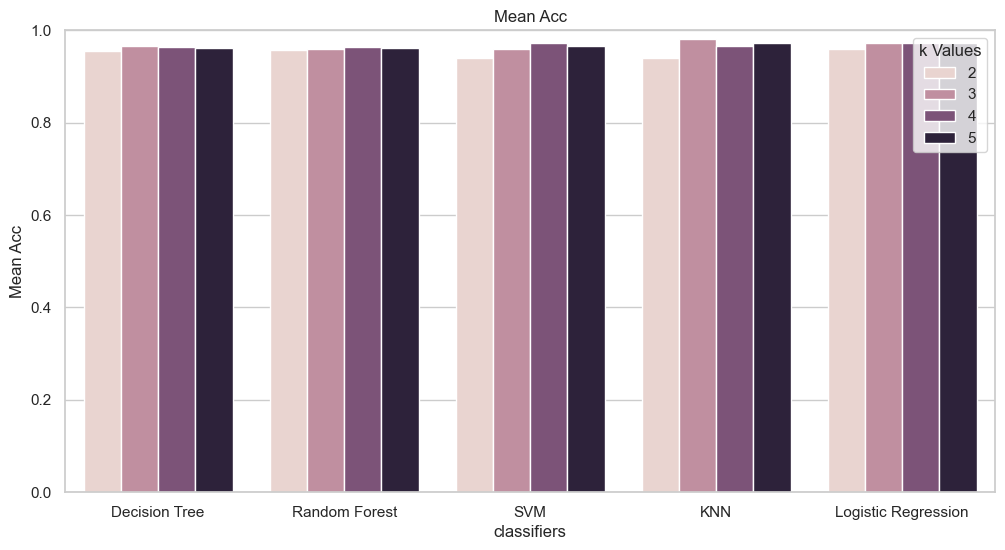

In [30]:
# 做可视化
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

plt.figure(figsize=(12,6))
sns.barplot(data=comparison_df,x='Classifier',y='Mean Accuracy',hue = 'k')
plt.title('Mean Acc')
plt.ylabel('Mean Acc')
plt.xlabel('Classifiers')
plt.legend(title='k Values')
plt.ylim(0, 1)
plt.show()